In [43]:
import numpy as np
import pandas as pd

In [44]:
df_cl_sent_base = pd.read_csv('../data/processed/headlines_cl_sent_base.csv')
df_cl_sent = pd.read_csv('../data/processed/headlines_cl_sent_pol_rapi.csv')

In [61]:
#df_cl_sent[df_cl_sent['site']=='aajtak.in']

In [45]:
print("Women related news")
df = df_cl_sent
print("This dataset has", len(df[df['country_of_pub']=='South Africa']), "headlines from South Africa", len(df[df['country_of_pub']=='India']), "headlines from India",
      len(df[df['country_of_pub']=='UK']), "headlines from the UK and", len(df[df['country_of_pub']=='USA']), "headlines from the U.S.")



Women related news
This dataset has 12057 headlines from South Africa 66687 headlines from India 78355 headlines from the UK and 140985 headlines from the U.S.


In [49]:
# calculate polarity by getting the absolute value of the sentiment

df_cl_sent_base['polarity'] = np.abs(df_cl_sent_base['compound_s'].values)
df_cl_sent['polarity'] = np.abs(df_cl_sent['compound_s'].values)

In [50]:
# remove unnecessary other columns

df_cl_sent_base = df_cl_sent_base[['site', 'country_of_pub', 'polarity']]
df_cl_sent = df_cl_sent[['site', 'country_of_pub',  'polarity']]

In [51]:
# rename the polarity columns
df_cl_sent_base.columns = ['site', 'country_of_pub', 'polarity_base']
df_cl_sent.columns = ['site', 'country_of_pub', 'polarity_women']

In [67]:
df_cl_sent_base['site'] = df_cl_sent_base['site'].apply(lambda x: x.lower())
df_cl_sent['site'] = df_cl_sent['site'].apply(lambda x: x.lower())

In [68]:
# groupby site and country of publication
df_cl_sent_base = df_cl_sent_base.groupby(['site', 'country_of_pub']).mean().reset_index()
df_cl_sent = df_cl_sent.groupby(['site', 'country_of_pub']).mean().reset_index()

In [73]:
# merge the two dataframes
polarity_comparison = pd.merge(df_cl_sent_base, df_cl_sent, on = ['site', 'country_of_pub'])

# Calculate the difference in polarity
polarity_comparison['difference'] = polarity_comparison['polarity_women'] - polarity_comparison['polarity_base']


In [74]:
polarity_comparison['site_clean'] = polarity_comparison['site'].apply(lambda x: x.replace('.com', ''))

In [76]:
polarity_comparison = polarity_comparison.sort_values(by = 'difference', ascending = False).groupby('site_clean').head(1)

In [79]:
polarity_comparison.sort_values(by = 'difference', ascending = False)

,site,country_of_pub,polarity_base,polarity_women,difference,site_clean
33,dailysun.co.za,South Africa,0.000000,0.510600,0.510600,dailysun.co.za
66,howtogeek.com,USA,0.131529,0.636900,0.505371,howtogeek
103,news.google.com,USA,0.256644,0.467133,0.210489,news.google
93,msn.com,USA,0.186156,0.375641,0.189484,msn
116,pcadvisor.co.uk,UK,0.181892,0.361200,0.179308,pcadvisor.co.uk
...,...,...,...,...,...,...
123,prokerala.com,India,0.184016,0.143061,-0.040955,prokerala
80,littlethings.com,USA,0.319853,0.263826,-0.056027,littlethings
94,msnbc.com,USA,0.285536,0.225151,-0.060385,msnbc
178,which.co.uk,UK,0.260789,0.145600,-0.115189,which.co.uk


In [80]:
polarity_comparison.to_csv('../data/processed/polarity_comparison.csv')

TODO :
- Aaj tak is in Hindi. Scrape old data again for this. 
- Scrape old data again?

In [10]:
polarity_comparison.sort_values(by = 'polarity_base', ascending = False)[0:10]

,site,country_of_pub,polarity_base,polarity_women,difference
152,theblaze.com,USA,0.394345,0.416275,0.021930
40,dailyrecord.co.uk,UK,0.389184,0.462960,0.073776
128,rawstory.com,USA,0.386745,0.453197,0.066452
160,thesun.co.uk,UK,0.379746,0.401276,0.021530
118,opindia.com,India,0.377451,0.437675,0.060224
114,nydailynews.com,USA,0.369138,0.461940,0.092802
92,manchestereveningnews.co.uk,UK,0.364288,0.474588,0.110300
98,mirror.co.uk,UK,0.341467,0.420508,0.079041
136,scoopwhoop.com,India,0.341281,0.344489,0.003209
134,rt.com,USA,0.340094,0.359741,0.019647


In [11]:
polarity_comparison.sort_values(by = 'polarity_women', ascending = False)[0:10]

,site,country_of_pub,polarity_base,polarity_women,difference
73,howtogeek.com,USA,0.131529,0.636900,0.505371
42,dailysun.co.za,South Africa,0.000000,0.510600,0.510600
92,manchestereveningnews.co.uk,UK,0.364288,0.474588,0.110300
108,news.google.com,USA,0.256644,0.467133,0.210489
84,ksl.com,USA,0.313636,0.465765,0.152129
40,dailyrecord.co.uk,UK,0.389184,0.462960,0.073776
114,nydailynews.com,USA,0.369138,0.461940,0.092802
20,birminghammail.co.uk,UK,0.334063,0.455194,0.121131
128,rawstory.com,USA,0.386745,0.453197,0.066452
118,opindia.com,India,0.377451,0.437675,0.060224


In [12]:
polarity_comparison.sort_values(by = 'difference', ascending = False)[0:5]

,site,country_of_pub,polarity_base,polarity_women,difference
42,dailysun.co.za,South Africa,0.000000,0.510600,0.510600
73,howtogeek.com,USA,0.131529,0.636900,0.505371
9,Msn.com,USA,0.070175,0.392926,0.322751
108,news.google.com,USA,0.256644,0.467133,0.210489
120,pcadvisor.co.uk,UK,0.181892,0.361200,0.179308


In [13]:
polarity_comparison[polarity_comparison['site']=='cnn.com']

,site,country_of_pub,polarity_base,polarity_women,difference
34,cnn.com,UK,0.265837,0.282206,0.016369


In [70]:
polarity_comparison = polarity_comparison[polarity_comparison['site']!='aajtak.in']

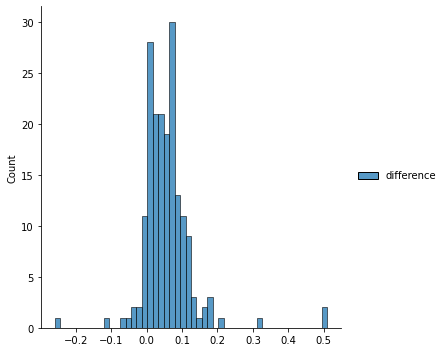

In [15]:
import seaborn as sns
sns.displot(polarity_comparison[['difference']], kind="hist", bins = 50)

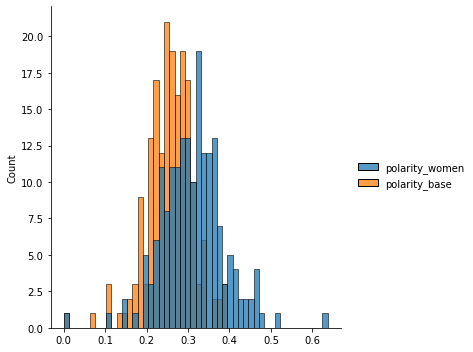

In [16]:
import seaborn as sns

sns.displot(polarity_comparison[['polarity_women', 'polarity_base']], kind="hist", bins = 50)

In [17]:
import plotly.express as px
fig = px.bar(polarity_comparison.sort_values(by = 'polarity_base', ascending = False), x = 'site', y ='polarity_base')
fig.show()

In [18]:
import plotly.express as px
fig = px.bar(polarity_comparison.sort_values(by = 'polarity_women', ascending = False), x = 'site', y ='polarity_women')
fig.show()

In [19]:
import plotly.express as px
df = polarity_comparison[polarity_comparison['country_of_pub']=='India']
df = df.sort_values(by = 'difference', ascending = True)
fig = px.bar(df, x = 'site', y ='difference')
fig.show()

In [20]:
import plotly.express as px
df = polarity_comparison[polarity_comparison['country_of_pub']=='UK']
df = df.sort_values(by = 'difference', ascending = True)
fig = px.bar(df, x = 'site', y ='difference')
fig.show()

In [21]:
import plotly.express as px
df = polarity_comparison[polarity_comparison['country_of_pub']=='South Africa']
df = df.sort_values(by = 'difference', ascending = True)
fig = px.bar(df, x = 'site', y ='difference')
fig.show()

In [22]:
import plotly.express as px
df = polarity_comparison[polarity_comparison['country_of_pub']=='USA']
df = df.sort_values(by = 'difference', ascending = True)
fig = px.bar(df, x = 'site', y ='difference')
fig.show()